<a href="https://colab.research.google.com/github/mygithub1234/Machine-Learning/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
# Read the data
data = pd.read_csv('/content/drive/My Drive/python material/python project/foodhub_order_project.csv')

In [ ]:
# Write your code here to view the first 5 rows
# First five rows of the data.
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# Number of rows and columns
data.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   order_id, customer_id, cost_of_the_order, food_preparation_time and deliver_time are all numerical columns
*   restaurant_name, cuisine_type, daty_of_the_week and rating seem to be categorical
*   rating is usually represented as numerical data type so might need to be converted into integer type to be able analyze data accurately




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# Checking for missing values in the data
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
### There are no missing values present in the data



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here

# Statistical summary of the data
data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

*   Minimum Time it takes for food to be prepared = 20.00 min
*   Average Time it takes for the food to be prepared = 27.37 min
*   Maximum Time it takes for the food to be prepared = 35.00 min


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Number of orders not rated
countNotGiven = data['rating'].value_counts()
print(countNotGiven.iloc[0:1])

rating
Not given    736
Name: count, dtype: int64


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## Analysis for order id

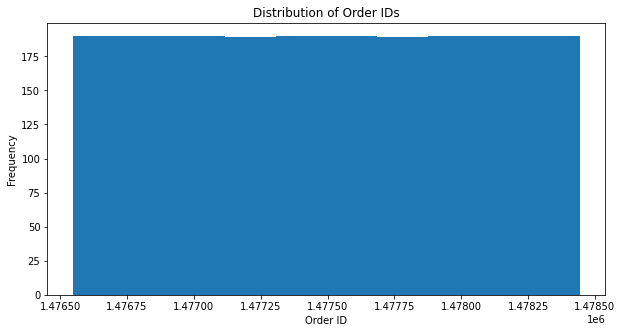

In [ ]:
# Univariate Analysis for order_id
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)
plt.figure(figsize = (10,5))
plt.hist(data['order_id'])
plt.xlabel('Order ID')
plt.ylabel('Frequency')
plt.title('Distribution of Order IDs')
plt.show()



In [ ]:
data['order_id'].describe()

,order_id
count,1.898000e+03
mean,1.477496e+06
std,5.480497e+02
min,1.476547e+06
25%,1.477021e+06
50%,1.477496e+06
75%,1.477970e+06
max,1.478444e+06


## Analysis for customer id

In [ ]:
# count of orders placed by customers in descending order
data_customers_1 = data['order_id'].groupby(data['customer_id']).count().sort_values(ascending=False)
print(data_customers_1.value_counts())

order_id
1     784
2     267
3      83
4      33
5      19
6       6
7       4
13      1
10      1
9       1
8       1
Name: count, dtype: int64


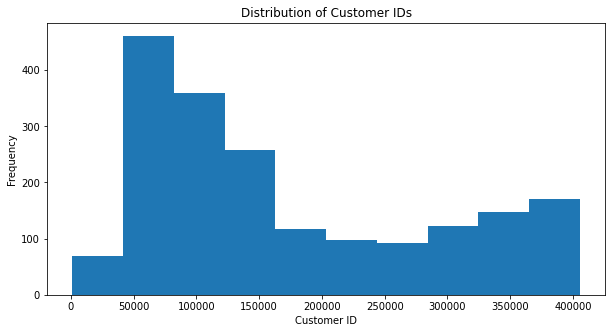

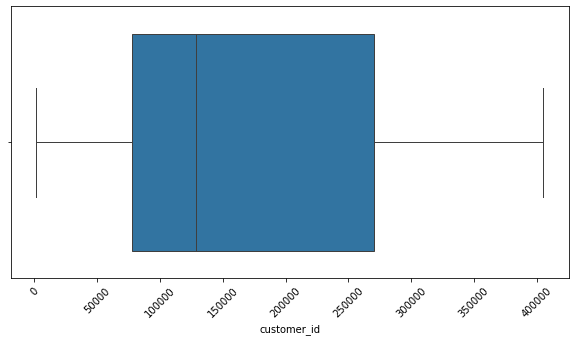

In [ ]:
# Univariate Analysis for customer_id
plt.figure(figsize = (10,5))
plt.hist(data['customer_id'])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title('Distribution of Customer IDs')
plt.show()
plt.figure(figsize = (10,5))
ax = sns.boxplot(data = data, x=data['customer_id'])
ax.tick_params(axis='x', rotation=45)
ax.set_facecolor('white')

## Analysis for Restaurant Name

<Figure size 2160x360 with 0 Axes>

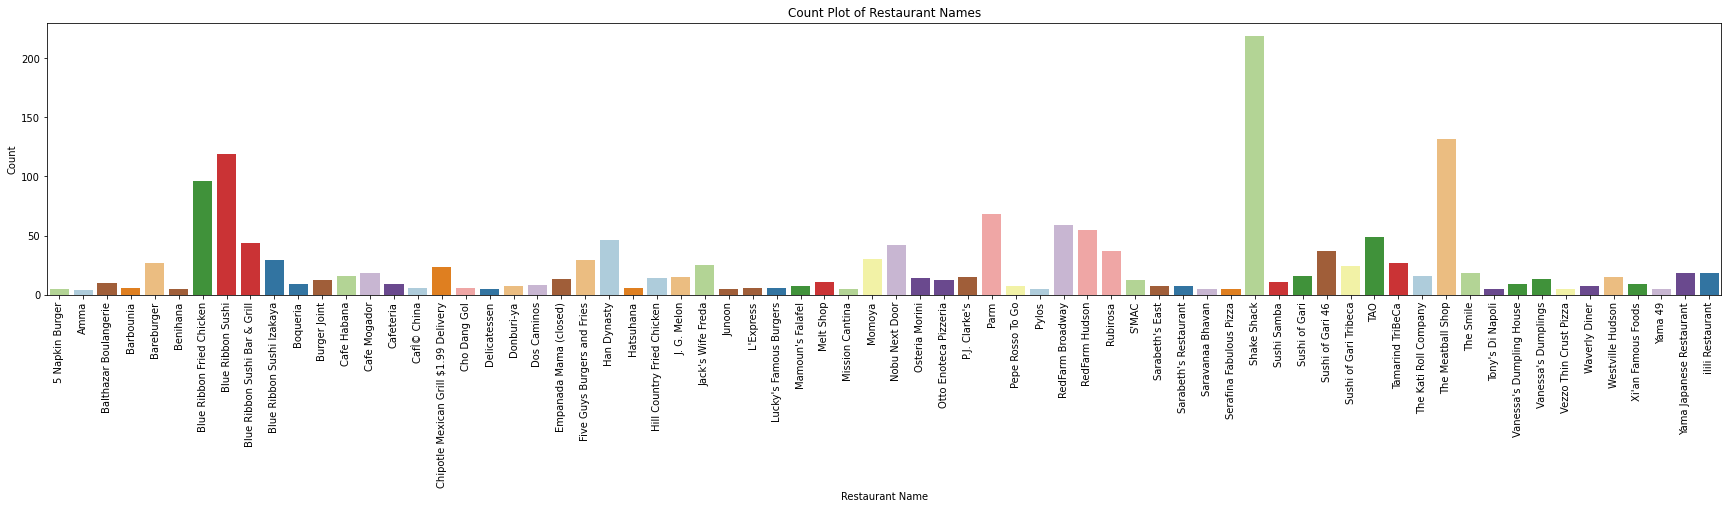

<Figure size 2160x360 with 0 Axes>

In [ ]:
# Univariate Analysis for restaurant_name
plt.figure(figsize = (30,5))
ax = sns.countplot(data=data, x=data['restaurant_name'],hue=data['restaurant_name'],legend=False,palette="Paired",order=data['restaurant_name'].value_counts().index[:70].sort_values())
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Restaurant Name", ylabel="Count", title="Count Plot of Restaurant Names")
plt.figure(figsize = (30,5))



## Observations for restaurant name:
Shake Shack restaurant received highest number of orders

## Analysis for Csuisine Type

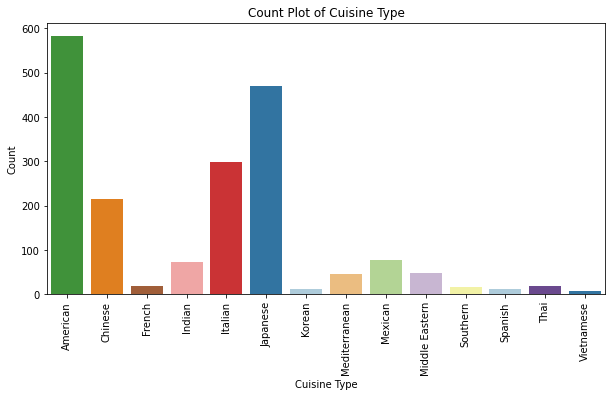

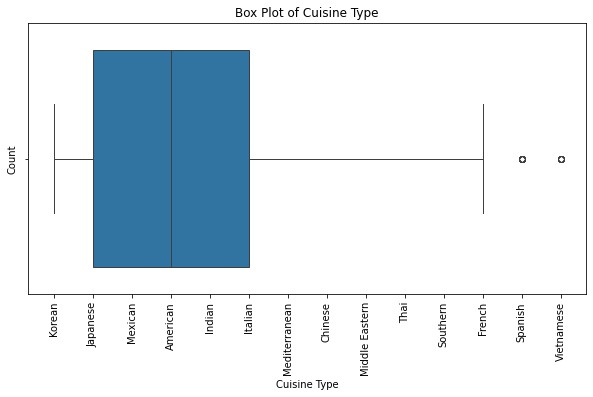

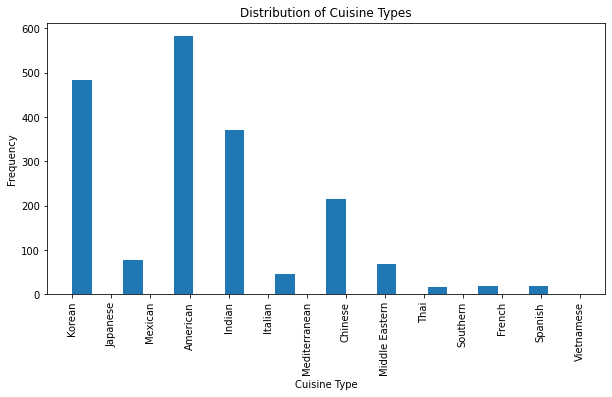

In [ ]:
#Univariate analysis for cuisine_type

#Count Plot for Cuisine Type
plt.figure(figsize = (10,5))
ax=sns.countplot(data=data, x=data['cuisine_type'],hue=data['cuisine_type'],legend=False,palette="Paired",order=data['cuisine_type'].sort_values())
ax.set(xlabel="Cuisine Type", ylabel="Count", title="Count Plot of Cuisine Type")
ax.tick_params(axis='x', rotation=90)
plt.show()

#Box Plot for Cuisine Type
plt.figure(figsize = (10,5))
ax=sns.boxplot(data = data, x = data['cuisine_type'])
ax.set(xlabel="Cuisine Type", ylabel="Count", title="Box Plot of Cuisine Type")
ax.tick_params(axis='x', rotation=90)
plt.show()

#Hist Plot for Cuisine Type
plt.figure(figsize = (10,5))
ax=plt.hist(data['cuisine_type'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Distribution of Cuisine Types')
plt.show()

## Observations for Cuisine Type:
American Cuisine is most popular cuisine followed by Koerean and Indian. Also Cusine type is skewed to the left with few outliers

## Cost Of The Order

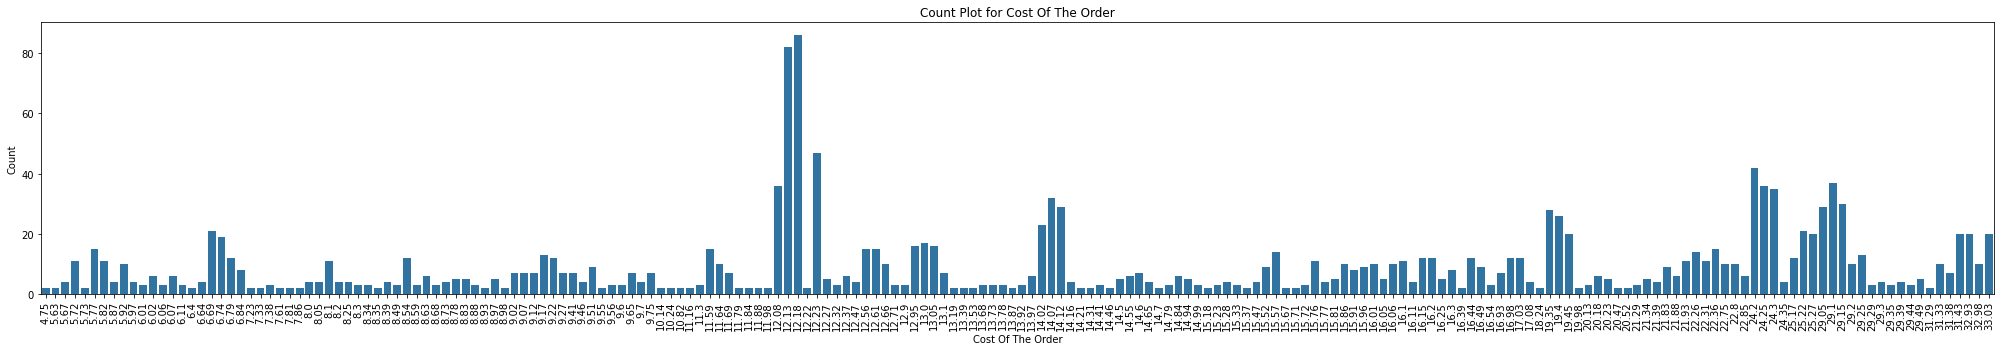

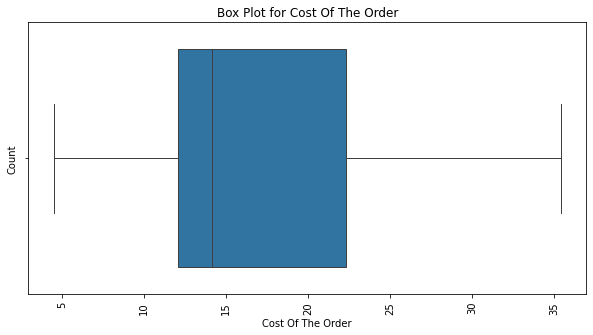

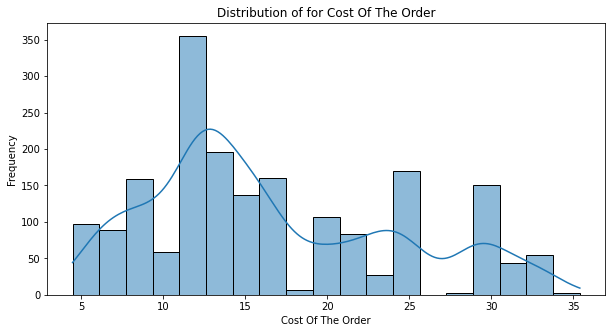

In [ ]:
#Univariate analysis for Cost Of The Order

#Count Plot
plt.figure(figsize = (35,5))
ax=sns.countplot(data=data, x=data['cost_of_the_order'],order=data['cost_of_the_order'].value_counts().index[:200].sort_values())
ax.set(xlabel="Cost Of The Order", ylabel="Count", title="Count Plot for Cost Of The Order")
ax.tick_params(axis='x', rotation=90)
plt.show()

#Box Plot
plt.figure(figsize = (10,5))
ax=sns.boxplot(data = data, x = data['cost_of_the_order'])
ax.set(xlabel="Cost Of The Order", ylabel="Count", title="Box Plot for Cost Of The Order")
ax.tick_params(axis='x', rotation=90)
plt.show()

#Hist Plot
plt.figure(figsize = (10,5))
ax=sns.histplot(data['cost_of_the_order'],kde=True)
plt.xlabel('Cost Of The Order')
plt.ylabel('Frequency')
plt.title('Distribution of for Cost Of The Order')
plt.show()

## Observations for Cost of the Order
Average cost of order is around 12.00 shows left skewed with max cost around 35


## Analysis for Day of the Week

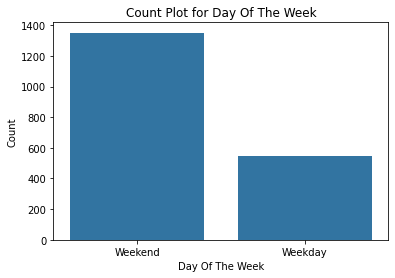

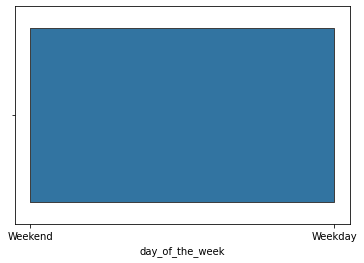

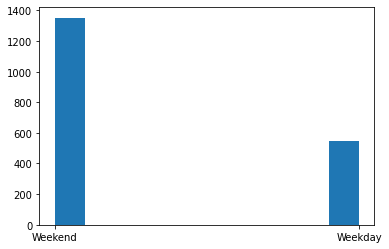

In [ ]:
#Univariate analysis for Day Of The Week

#Count Plot
ax=sns.countplot(data=data, x=data['day_of_the_week'])
ax.set(xlabel="Day Of The Week", ylabel="Count", title="Count Plot for Day Of The Week")
plt.show()

#Box Plot
ax=sns.boxplot(data = data, x = data['day_of_the_week'])
#ax.set(xlabel="Day Of The Week", ylabel="Count", title="Box Plot for Day Of The Week")
plt.show()

#Hist Plot
ax=plt.hist(data['day_of_the_week'])
#plt.xlabel('Day Of The Week')
#plt.ylabel('Frequency')
#plt.title('Distribution of for Day Of The Week')
plt.show()

## Observations for Day of the week:
There are more orders placed on the weekend

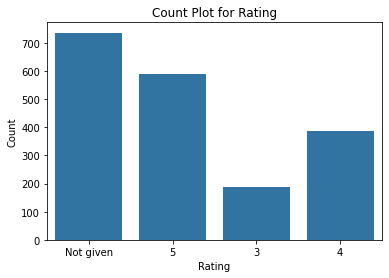

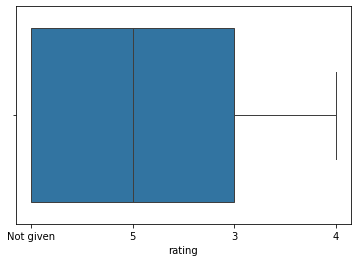

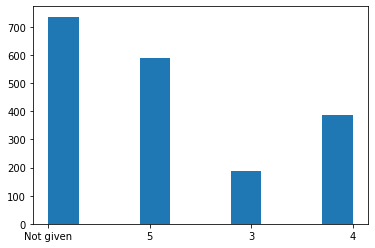

In [ ]:
#Univariate analysis for Rating

#Count Plot
ax=sns.countplot(data=data, x=data['rating'])
ax.set(xlabel="Rating", ylabel="Count", title="Count Plot for Rating")
plt.show()

#Box Plot
ax=sns.boxplot(data = data, x = data['rating'])
#ax.set(xlabel="Rating", ylabel="Count", title="Box Plot for Rating")
plt.show()

#Hist Plot
ax=plt.hist(data['rating'])
#plt.xlabel('Rating')
#plt.ylabel('Frequency')
#plt.title('Distribution of for Rating')
plt.show()

## Observations for Rating
There are more orders that does not have a rating

## Analysis for Food Preparation Time

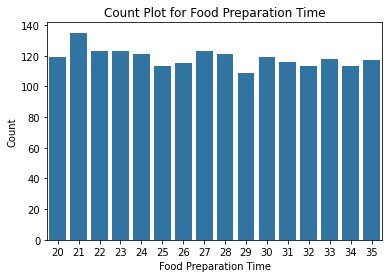

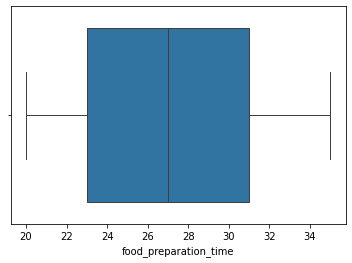

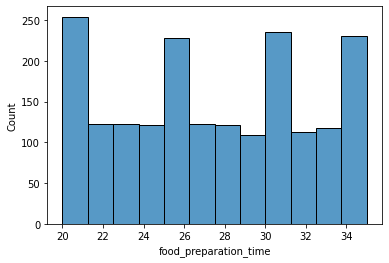

In [ ]:
#Univariate analysis for Food Preparation Time

#Count Plot
ax=sns.countplot(data=data, x=data['food_preparation_time'])
ax.set(xlabel="Food Preparation Time", ylabel="Count", title="Count Plot for Food Preparation Time")
plt.show()

#Box Plot
ax=sns.boxplot(data = data, x = data['food_preparation_time'])
#ax.set(xlabel="Food Preparation Time", ylabel="Count", title="Box Plot for Food Preparation Time")
plt.show()

#Hist Plot
ax=sns.histplot(data['food_preparation_time'])
#plt.xlabel('Food Preparation Time')
#plt.ylabel('Frequency')
#plt.title('Distribution of for Food Preparation Time')
plt.show()

## Analysis for Delivery Time

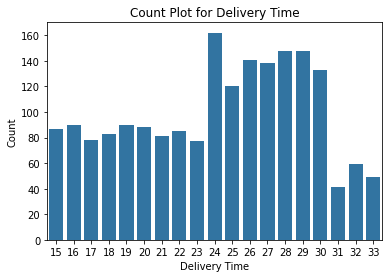

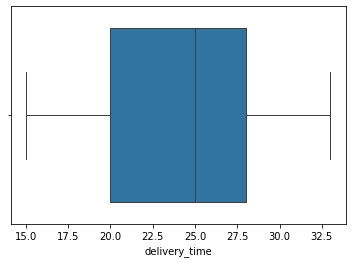

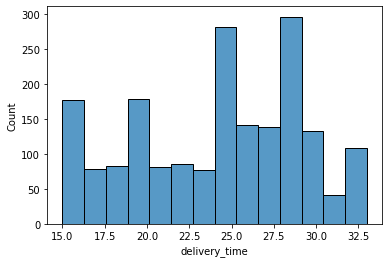

In [ ]:
#Univariate analysis for Food Delivery Time

#Count Plot
ax=sns.countplot(data=data, x=data['delivery_time'])
ax.set(xlabel="Delivery Time", ylabel="Count", title="Count Plot for Delivery Time")
plt.show()

#Box Plot
ax=sns.boxplot(data = data, x = data['delivery_time'])
ax.set(xlabel="Delivery Time", ylabel="Count", title="Box Plot for Delivery Time")
plt.show()

#Hist Plot
ax=sns.histplot(data['delivery_time'])
#plt.xlabel('Delivery Time')
#plt.ylabel('Frequency')
#plt.title('Distribution of for Delivery Time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants

# restaurants in terms of the number of orders received
data_restaurants = data['order_id'].groupby(data['restaurant_name']).count().sort_values(ascending=False)
print(data_restaurants)
print(data_restaurants.head())


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: order_id, Length: 178, dtype: int64
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
Shake Shack received more orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Most popular cuisine on weekends

#weekend orders
data_weekend = data[data['day_of_the_week'] == 'Weekend']
popular_weekend_cuisins = data_weekend['cuisine_type'].value_counts().head(1)
print('Most popular cuisin in the weekend: ' , popular_weekend_cuisins)

Most popular cuisin in the weekend:  cuisine_type
American    415
Name: count, dtype: int64


#### Observations:
American is the most popular cuisine type in the weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Cost of total orders
totalorders = data['cost_of_the_order'].count()
print('Cost of total orders', totalorders)

ordersMoreThan20 = data[data['cost_of_the_order'] > 20]

# Number of orders that cost more than 20 dollars
countMoreThan20 = ordersMoreThan20['cost_of_the_order'].count()
print('Number of orders that cost more than 20 dollars', countMoreThan20)

# Percentage of Number of orders that cost more than 20 dollars
print('Percentage of Number of orders that cost more than 20 dollars', (countMoreThan20*100/totalorders).round())


Cost of total orders 1898
Number of orders that cost more than 20 dollars 555
Percentage of Number of orders that cost more than 20 dollars 29.0


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Statistical data for deliver_time column
print(data['delivery_time'].describe())

# mean value of deliver_time
print('mean value of deliver_time',data['delivery_time'].mean().round(2))

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64
mean value of deliver_time 24.16


## Observations:
mean value of deliver_time 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# 3 most frequent customer with the number of orders they placed
print('Top 3 customers who ordered frequently',data['customer_id'].value_counts().head(3))


Top 3 customers who ordered frequently customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
max number of times any customer has ordered is 13.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


## Cuisine vs Food Cost of the Order

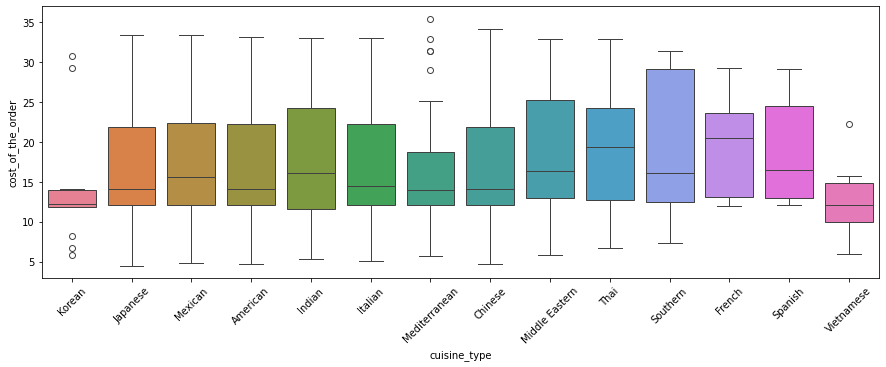

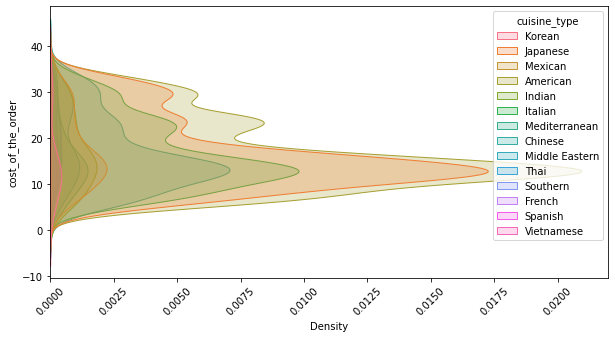

In [ ]:
# Relationship between Cusine Type and Cost of the order

#boxplot between cusine type and cost of the order
plt.figure(figsize = (15,5))
ax=sns.boxplot(data = data, x = data['cuisine_type'], y = data['cost_of_the_order'], hue='cuisine_type')
ax.tick_params(axis='x', rotation=45)
plt.show()

#kdeplot between cuisine type and day of the week
plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data, y = data['cost_of_the_order'], hue='cuisine_type', fill=True)
ax.tick_params(axis='x', rotation=45)
plt.show()

## Cuisine Type vs Day of the Week

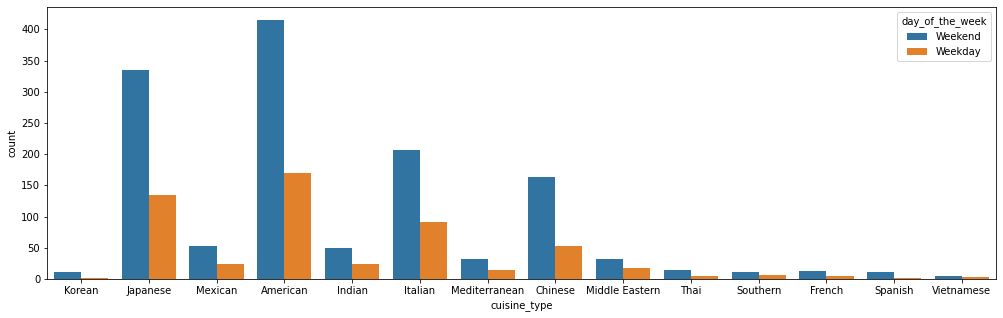

In [ ]:
plt.figure(figsize = (17,5))
sns.countplot(data=data, x='cuisine_type', hue='day_of_the_week')
plt.show()

## Cuisine Type Vs Rating

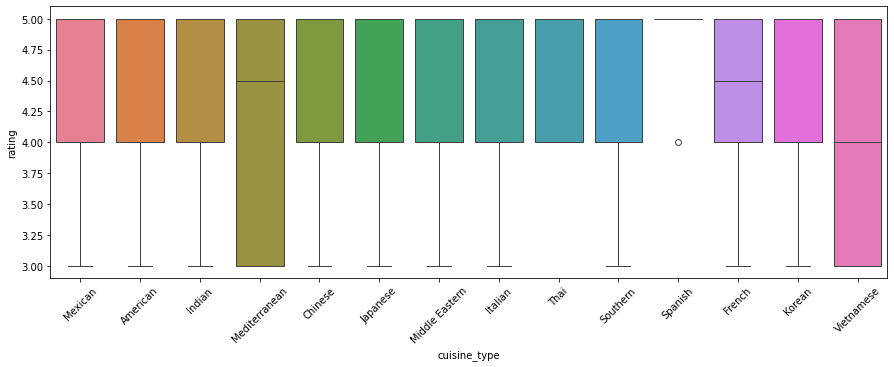

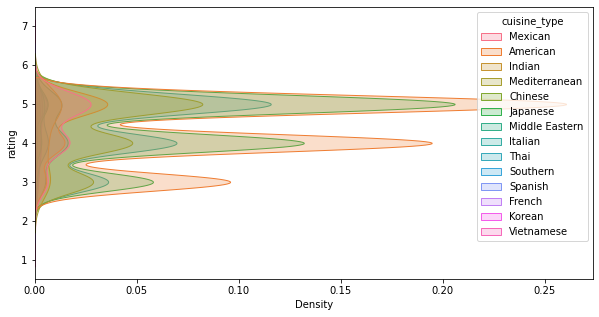

In [ ]:
# Relationship between Cusine Type and rating

# Filter the restaurant's column for those restaurants that do not have a rating as 'Not given'
data_rating = data[data['rating'] != 'Not given'].copy()
# Convert the 'rating' column to numeric
data_rating['rating'] = data_rating['rating'].astype(int)

#boxplot between cusine type and rating
plt.figure(figsize = (15,5))
ax=sns.boxplot(data = data_rating, x = data_rating['cuisine_type'], y = data_rating['rating'], hue='cuisine_type')
ax.tick_params(axis='x', rotation=45)
plt.show()

# kdeplot between cuisine type and day of the week

plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data_rating, y = data_rating['rating'], hue='cuisine_type', fill=True)
plt.show()



## Cuisine Type Vs Food Preparation Time

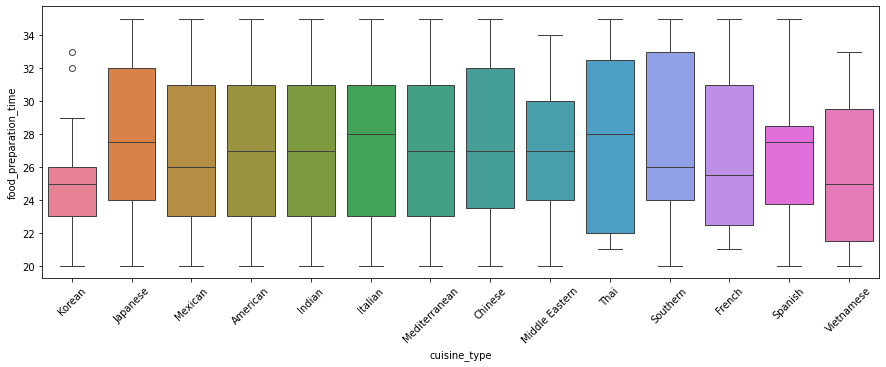

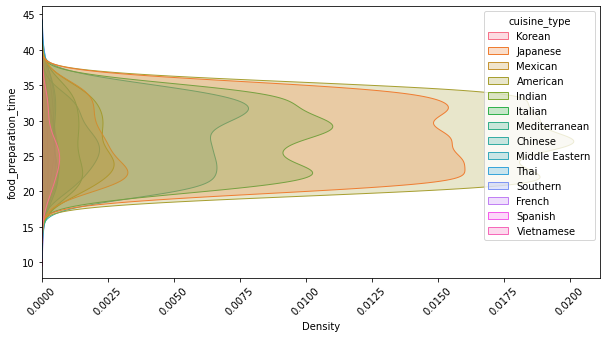

In [ ]:
# Relationship between Cusine Type and Food Preparation Time

#boxplot between cusine type and Food Preparation Time
plt.figure(figsize = (15,5))
ax=sns.boxplot(data = data, x = data['cuisine_type'], y = data['food_preparation_time'], hue='cuisine_type')
ax.tick_params(axis='x', rotation=45)
plt.show()

# kdeplot between cuisine type and food preparation time

plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data, y = data['food_preparation_time'], hue='cuisine_type', fill=True)
ax.tick_params(axis='x', rotation=45)
plt.show()


## Cuisine Type Vs Delivery Time

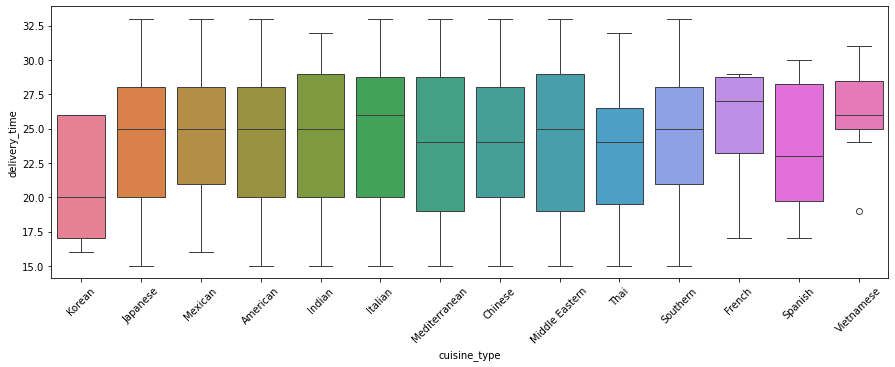

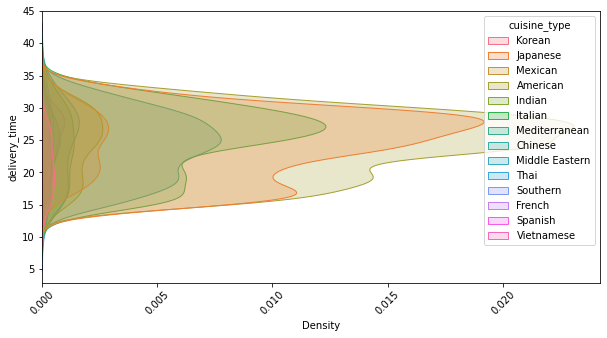

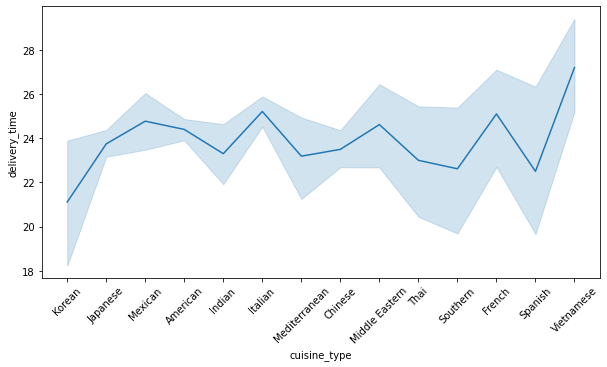

In [ ]:
# Relationship between Cusine Type and Delivery Time

#boxplot between cusine type and Delivery Time
plt.figure(figsize = (15,5))
ax=sns.boxplot(data = data, x = data['cuisine_type'], y = data['delivery_time'], hue='cuisine_type')
ax.tick_params(axis='x', rotation=45)
plt.show()

# kdeplot between cuisine type and delivery time

plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data, y = data['delivery_time'], hue='cuisine_type', fill=True)
ax.tick_params(axis='x', rotation=45)
plt.show()

plt.figure(figsize = (10,5))
ax=sns.lineplot(data = data, x = 'cuisine_type', y = data_rating['delivery_time'])
ax.tick_params(axis='x', rotation=45)
plt.show()

## Day of the Week Vs Delivery Time

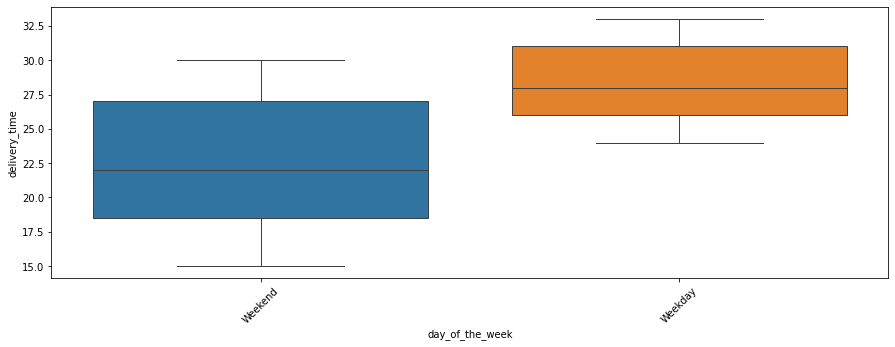

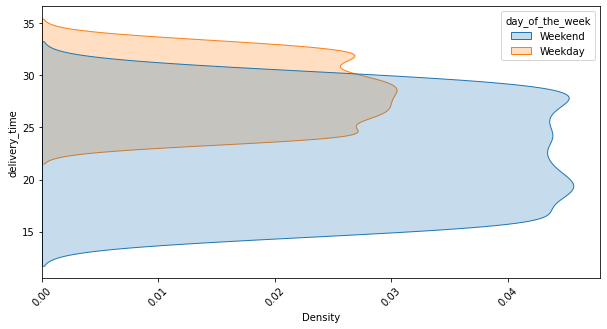

In [ ]:
# Relationship between Day of the Week and Delivery Time

#boxplot between Rating and Cost of the Order
plt.figure(figsize = (15,5))
ax=sns.boxplot(data = data, x = data['day_of_the_week'], y = data['delivery_time'], hue='day_of_the_week')
ax.tick_params(axis='x', rotation=45)
plt.show()

# kdeplot between cuisine type and delivery time

plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data, y = data['delivery_time'], hue='day_of_the_week', fill=True)
ax.tick_params(axis='x', rotation=45)
plt.show()


## Cost of the Order Vs Rating

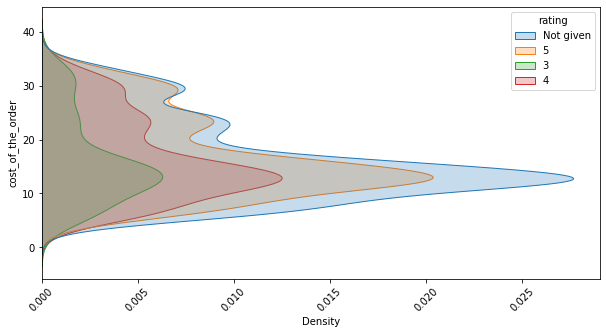

In [ ]:
# Relationship between Cost of the order and rating

#boxplot between Rating and Cost of the Order
#plt.figure(figsize = (15,5))
#ax=sns.boxplot(data = data, x = data['cost_of_the_order'], y = data['rating'], hue='cost_of_the_order')
#ax.tick_params(axis='x', rotation=45)
#plt.show()

# kdeplot between cuisine type and delivery time

plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data, y = data['cost_of_the_order'], hue='rating', fill=True)
ax.tick_params(axis='x', rotation=45)
plt.show()

## Rating Vs Cost of the Order

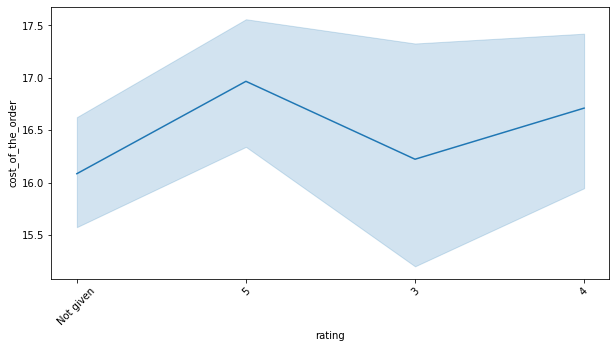

In [ ]:
# Relationship between Rating and Cost of the Order

plt.figure(figsize = (10,5))
ax=sns.lineplot(data = data, x = data['rating'], y = data['cost_of_the_order'])
ax.tick_params(axis='x', rotation=45)
plt.show()

## Rating Vs Delivery Time

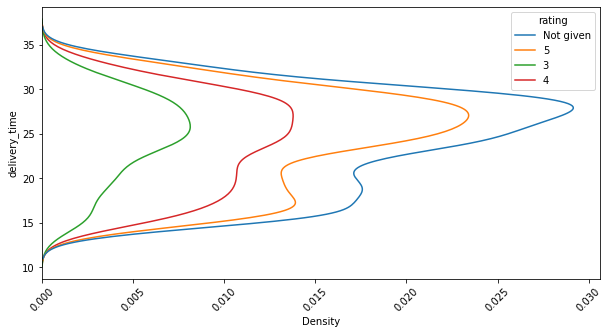

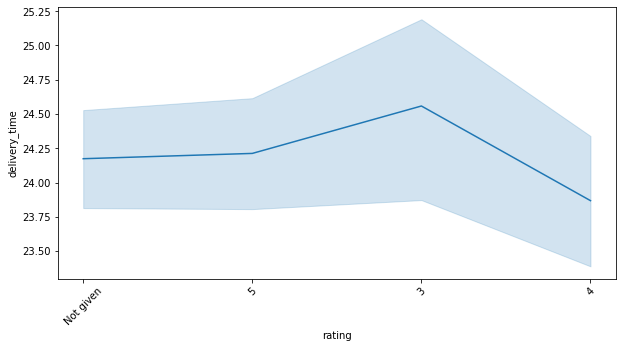

In [ ]:
# Relationship between Rating and Delivery Time

# kdeplot between rating and delivery time

plt.figure(figsize = (10,5))
ax=sns.kdeplot(data = data, y = data['delivery_time'], hue='rating')
ax.tick_params(axis='x', rotation=45)
plt.show()

plt.figure(figsize = (10,5))
ax=sns.lineplot(data = data, x = 'rating', y = data['delivery_time'])
ax.tick_params(axis='x', rotation=45)
plt.show()

## Correlation between different variables

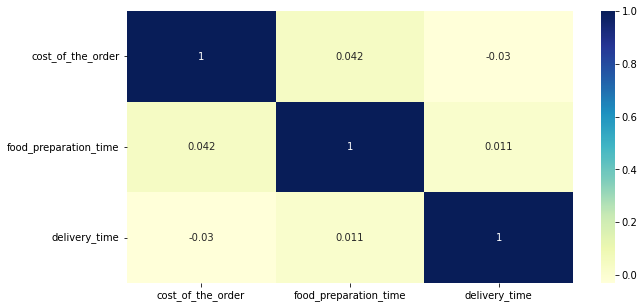

In [ ]:
#Correlation between continuous variables
con_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (10,5))
sns.heatmap(data[con_list].corr(), annot=True, cmap='YlGnBu')
plt.show()

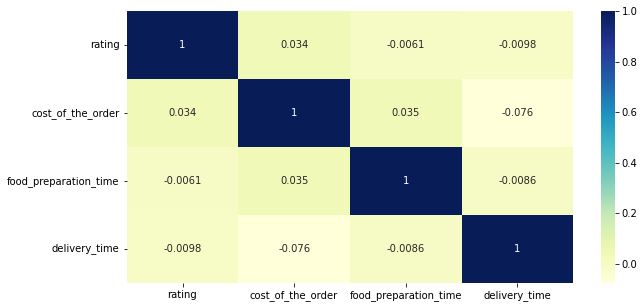

In [ ]:
#Correlation between rating, food_preparation_time, delivery_time, cost_of_the_order
#  Filter the restaurant's column for those restaurants that do not have a rating as 'Not given'
data_rating = data[data['rating'] != 'Not given'].copy()
# Convert the 'rating' column to numeric
data_rating['rating'] = data_rating['rating'].astype(int)

con_list = ['rating','cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (10,5))
sns.heatmap(data_rating[con_list].corr(), annot=True, cmap='YlGnBu')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#  Filter the restaurant's column for those restaurants that do not have a rating as 'Not given'
datawithrating = data[data['rating'] != 'Not given'].copy()
# Convert the 'rating' column to numeric
datawithrating['rating'] = datawithrating['rating'].astype(int)

# Create a dataframe that contains the restaurant names with their rating counts
data_with_rating_count = datawithrating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# Get all the restaurant names that have a rating count of more than 50
data_with_rating_count = data_with_rating_count[data_with_rating_count['rating']>50]
data_filter_restaurants = datawithrating[datawithrating['restaurant_name'].isin(data_with_rating_count['restaurant_name'])]

# Mean rating of the restaurants by using the group by function
data_with_rating_mean = data_filter_restaurants.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
data_with_rating_mean_gt4 = data_with_rating_mean[data_with_rating_mean['rating']>4]

print(data_with_rating_mean_gt4.head())




             restaurant_name    rating
0          The Meatball Shop  4.511905
1  Blue Ribbon Fried Chicken  4.328125
2                Shake Shack  4.278195
3          Blue Ribbon Sushi  4.219178


#### Observations:
The Meatball Shop has highest rating generated.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# function to calculate revenue depending on different values for cost of the order
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Compute revenue for cost of the order by applying the function
revenue = data['cost_of_the_order'].apply(compute_rev)

# Save the revenue in a different column
data = data.assign(revenue = revenue)

# top restaurants that generate highest revenue
max_revenue = data['revenue'].groupby(data['restaurant_name']).sum().sort_values(ascending=False)
print(max_revenue)
max_revenue.head()

restaurant_name
Shake Shack                   703.6070
The Meatball Shop             419.8285
Blue Ribbon Sushi             360.4605
Blue Ribbon Fried Chicken     340.2035
Parm                          218.5570
                                ...   
Market Table                    1.0185
Wa Jeal                         1.0110
Cipriani Le Specialita          0.8880
Big Wong Restaurant _¤¾Ñ¼      0.8880
Hunan Manor                     0.8580
Name: revenue, Length: 178, dtype: float64


,revenue
restaurant_name,
Shake Shack,703.6070
The Meatball Shop,419.8285
Blue Ribbon Sushi,360.4605
Blue Ribbon Fried Chicken,340.2035
Parm,218.5570


In [ ]:
# Calculate total revenue as summation of Revenue column values
total_rev = data['revenue'].sum()
print(total_rev)

6166.303


## Observations:
Total revenue generated is 6166.303 out of which 703.6070 is the revenue generated by the popular restaurant followed by 419.8285 is the revenue generated by the Meatball Shop

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Total Number of Orders
total_Number_of_orders = data.count().iloc[0]

# Calculate total Delivery Time
total_delivery_time = data['delivery_time'] + data['food_preparation_time']

# Save the total delivery time in a different column
data = data.assign(total_delivery_time = total_delivery_time)

data.head()

print(data.head())

# Number of orders that take more than 60 minutes to deliver
total_delivery_time_gt60 = data[total_delivery_time > 60].count().iloc[0]


# Percentage of Orders that take more than 60 minutes to deliver
percentage_of_delivery_time_gt60 = (total_delivery_time_gt60*100/total_Number_of_orders)
print(percentage_of_delivery_time_gt60.round(2))


   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  revenue  total_delivery_time  
0             20   7.6875                   45  
1             23   1.8120                   48  

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate weekday mean
weekday_mean = data['delivery_time'][data['day_of_the_week'] == 'Weekday'].mean().round(2)

# Calculate Weekend mean
weekend_mean = data['delivery_time'][data['day_of_the_week'] == 'Weekend'].mean().round(2)

print('The mean delivery time vary during weekdays',weekday_mean)
print('The mean delivery time vary during weekends',weekend_mean)

The mean delivery time vary during weekdays 28.34
The mean delivery time vary during weekends 22.47


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Some Cuisine Types are rightly skewed.. It mean there are some outliers
*  There are very few orders for Vietnamese cuisine type
*  Restaurant with most orders is American
*  Based on the day of the week analysis, there are more orders placed on the weekend than weekdays
*  Based on the analysis for rating, there are more orders that does not have a rating
*  Orders that have rating, there are more orders with 5 rating and lest with rating of 3.
*  maximum number of times that a customer repeated their order is 13
*  number of customers who ordered only once is 784






### Recommendations:

*  Improve the overall rating or feedback system.
*  For first time customers should be encourage with a discount on their next order provided they give a productive feedback. this would also improve repeat orders
*  Restaurants that has higher average rating should be provided incentives as well
*  Obtain ratings from different sources. For example, any verbal feedback provided by customers to the company should be communicated back to the restaurants
*  Repeating customers who provide honest feedback should be encouraged to provide feedback in different categories that they like. For example, quality of the order delivered, packaging etc., any specific item in the menu that they like etc.,
*  Restaurants should analyse the feedback received and try to work on improving the overall quality of the orders

---